In [1]:
#cleaning up prophet warnings
import warnings
warnings.simplefilter('ignore')

In [3]:
!pip install pystan prophet

Defaulting to user installation because normal site-packages is not writeable
  Using cached pystan-3.10.0-py3-none-any.whl (13 kB)
  Using cached pysimdjson-6.0.2-cp310-cp310-win_amd64.whl (173 kB)
  Using cached pystan-3.9.1-py3-none-any.whl (13 kB)
  Using cached aiohttp-3.11.18-cp310-cp310-win_amd64.whl (442 kB)
  Using cached pystan-3.9.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.8.0-py3-none-any.whl (13 kB)
  Using cached clikit-0.6.2-py2.py3-none-any.whl (91 kB)
  Using cached pystan-3.7.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.6.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.5.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.4.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.3.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.2.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.1.1-py3-none-any.whl (13 kB)
  Using cached pystan-3.1.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.0.2-py3-none-any.whl (13 kB)
  Using cached pystan-3.0.1-py3-none-any.w

  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [6 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\Sehar Irfan\AppData\Local\Temp\pip-install-nix2t3cv\pystan_196279a9898a43f8b0e5049ca1cdb2cb\setup.py", line 122, in <module>
      from Cython.Build.Inline import _get_build_extension
  ModuleNotFoundError: No module named 'Cython'
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

Encountered error while generating package metadata.

See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [2]:
import pandas as pd
from prophet import Prophet

# Single Time Series Forecasting

In [6]:
#forecasting for one single time series (one product, one store)
df = pd.read_csv("C:/Users/Sehar Irfan/OneDrive/Documents/Datasets/sales_forecast_data.csv")
df.head()

,Time Date,Product,Store,Value
0,1012018,2667437,QLD_CW_ST0203,2926.000
1,2012018,2667437,QLD_CW_ST0203,2687.531
2,3012018,2667437,QLD_CW_ST0203,2793.000
3,4012018,2667437,QLD_CW_ST0203,2394.000
4,5012018,2667437,QLD_CW_ST0203,2660.000


In [13]:
#summary statistics
df.describe()
df.dtypes

Time Date      int64
Product        int64
Store         object
Value        float64
dtype: object

In [9]:
#checking if only a single product and store for time series analysis
#only need two specific columns for prophet: ds (dates), y (value)
print(df['Product'].unique())
print(df['Store'].unique())

[2667437]
['QLD_CW_ST0203']


In [17]:
#extracting dates and making ds (datestamp) column for prophet as required as one of the inputs
#needs to be of datetime type

df['Year'] = df['Time Date'].apply(lambda x: str(x)[-4:])
df['Month'] = df['Time Date'].apply(lambda x: str(x)[-6:-4])
df['Day'] = df['Time Date'].apply(lambda x: str(x)[:-6])
df['ds'] = pd.DatetimeIndex(df["Year"] + '-' + df['Month'] + '-' + df['Day'])
df.head()

,Time Date,Product,Store,Value,Year,Month,Day,ds
0,1012018,2667437,QLD_CW_ST0203,2926.000,2018,01,1,2018-01-01
1,2012018,2667437,QLD_CW_ST0203,2687.531,2018,01,2,2018-01-02
2,3012018,2667437,QLD_CW_ST0203,2793.000,2018,01,3,2018-01-03
3,4012018,2667437,QLD_CW_ST0203,2394.000,2018,01,4,2018-01-04
4,5012018,2667437,QLD_CW_ST0203,2660.000,2018,01,5,2018-01-05


In [ ]:
df.drop(['Time Date', 'Product', 'Store', 'Year', 'Month','Day'], axis = 1, inplace = True)
df.columns = ['y','ds']

In [26]:
df.head()

,y,ds
0,2926.000,2018-01-01
1,2687.531,2018-01-02
2,2793.000,2018-01-03
3,2394.000,2018-01-04
4,2660.000,2018-01-05


In [27]:
#training prophet model over dataset

m = Prophet(interval_width = 0.95, daily_seasonality=True) #since daily data
model = m.fit(df)

02:45:39 - cmdstanpy - INFO - Chain [1] start processing
02:45:40 - cmdstanpy - INFO - Chain [1] done processing


In [28]:
#Forecasting

future = m.make_future_dataframe(periods = 100, freq = 'D') #giving forecast for the next 100 days, 'D' predict by day
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,3042.708172,871.795735,4113.212166,3042.708172,3042.708172,-636.758612,-636.758612,-636.758612,472.568897,...,16.615617,16.615617,16.615617,-1125.943126,-1125.943126,-1125.943126,0.0,0.0,0.0,2405.949560
1,2018-01-02,3043.440046,745.991893,4004.489380,3043.440046,3043.440046,-646.928879,-646.928879,-646.928879,472.568897,...,-11.291430,-11.291430,-11.291430,-1108.206346,-1108.206346,-1108.206346,0.0,0.0,0.0,2396.511167
2,2018-01-03,3044.171921,692.985630,4063.793417,3044.171921,3044.171921,-621.144750,-621.144750,-621.144750,472.568897,...,-4.423866,-4.423866,-4.423866,-1089.289781,-1089.289781,-1089.289781,0.0,0.0,0.0,2423.027170
3,2018-01-04,3044.903795,898.022222,3911.873200,3044.903795,3044.903795,-574.201906,-574.201906,-574.201906,472.568897,...,22.497946,22.497946,22.497946,-1069.268749,-1069.268749,-1069.268749,0.0,0.0,0.0,2470.701889
4,2018-01-05,3045.635670,885.837675,4018.786206,3045.635670,3045.635670,-610.268414,-610.268414,-610.268414,472.568897,...,-34.566066,-34.566066,-34.566066,-1048.271245,-1048.271245,-1048.271245,0.0,0.0,0.0,2435.367255


In [29]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1175,2021-03-22,4237.903162,2246.169242,5270.909571,4234.245518,4241.893610,-509.966196,-509.966196,-509.966196,472.568897,...,16.615617,16.615617,16.615617,-999.150710,-999.150710,-999.150710,0.0,0.0,0.0,3727.936966
1176,2021-03-23,4238.989539,2164.844772,5249.461525,4235.265481,4243.022097,-527.435391,-527.435391,-527.435391,472.568897,...,-11.291430,-11.291430,-11.291430,-988.712858,-988.712858,-988.712858,0.0,0.0,0.0,3711.554148
1177,2021-03-24,4240.075916,2235.827294,5400.767284,4236.313621,4244.150016,-512.907214,-512.907214,-512.907214,472.568897,...,-4.423866,-4.423866,-4.423866,-981.052245,-981.052245,-981.052245,0.0,0.0,0.0,3727.168702
1178,2021-03-25,4241.162293,2169.645784,5294.858159,4237.362723,4245.277561,-481.684909,-481.684909,-481.684909,472.568897,...,22.497946,22.497946,22.497946,-976.751752,-976.751752,-976.751752,0.0,0.0,0.0,3759.477383
1179,2021-03-26,4242.248670,2181.846769,5272.449863,4238.412035,4246.405105,-538.306508,-538.306508,-538.306508,472.568897,...,-34.566066,-34.566066,-34.566066,-976.309339,-976.309339,-976.309339,0.0,0.0,0.0,3703.942162


In [32]:
#yhat is the prediction
forecast[['ds','yhat']]

,ds,yhat
0,2018-01-01,2405.949560
1,2018-01-02,2396.511167
2,2018-01-03,2423.027170
3,2018-01-04,2470.701889
4,2018-01-05,2435.367255
...,...,...
1175,2021-03-22,3727.936966
1176,2021-03-23,3711.554148
1177,2021-03-24,3727.168702
1178,2021-03-25,3759.477383


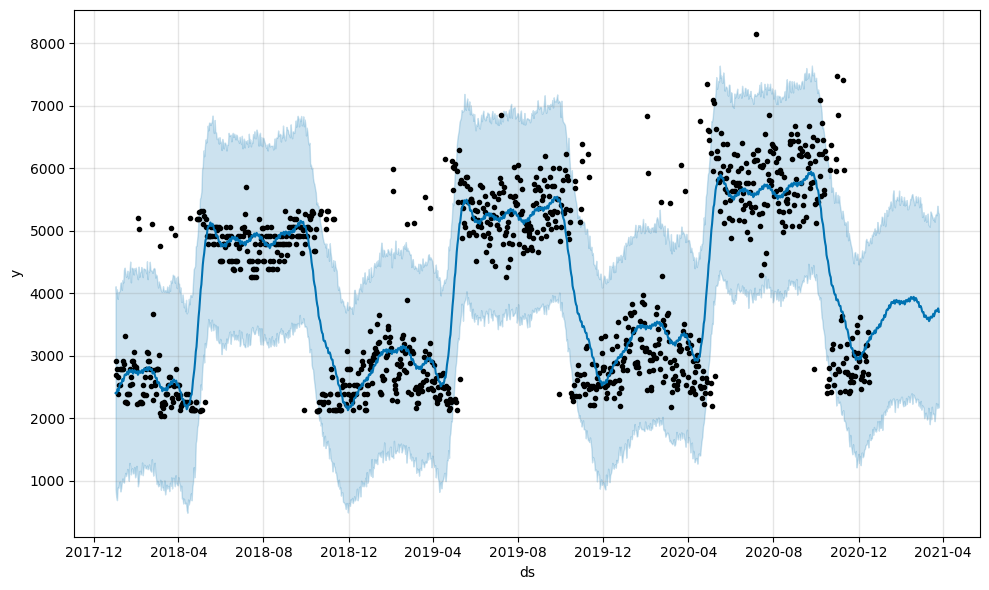

In [33]:
#plotting the forecast

plot1 = m.plot(forecast)

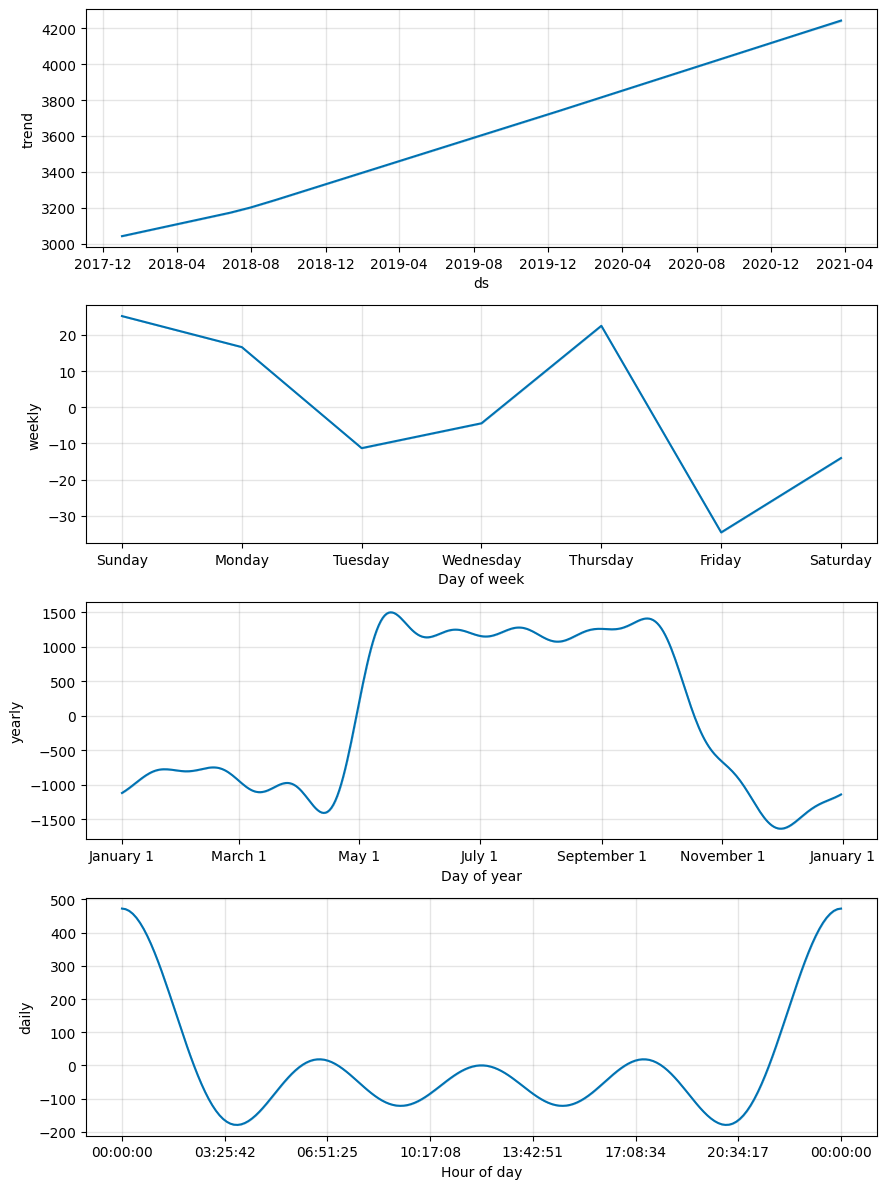

In [34]:
plot2 = m.plot_components(forecast)

In [ ]:
#Export the forecast results
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_csv("forecast_output.csv", index=False)

# Multiple Time Series Forecasting

In [11]:
import matplotlib.pyplot as plt
import os

In [3]:
#creating a sample dataset with multiple products and stores

data = {
    'Time Date': pd.date_range(start='2023-01-01', periods=200).tolist() * 4,  #200 days * 4 (product-store combos)
    'Product': ['A']*200 + ['A']*200 + ['B']*200 + ['B']*200,
    'Store': ['X']*200 + ['Y']*200 + ['X']*200 + ['Y']*200,
    'Sales': (
        list((50 + 0.1*pd.np.arange(200) + pd.np.random.randn(200)*5)) +
        list((30 + 0.15*pd.np.arange(200) + pd.np.random.randn(200)*5)) +
        list((20 + 0.05*pd.np.arange(200) + pd.np.random.randn(200)*3)) +
        list((60 + 0.12*pd.np.arange(200) + pd.np.random.randn(200)*7))
    )
}

df = pd.DataFrame(data)
print(df.head())


   Time Date Product Store      Sales
0 2023-01-01       A     X  53.987774
1 2023-01-02       A     X  56.102439
2 2023-01-03       A     X  55.188157
3 2023-01-04       A     X  43.105384
4 2023-01-05       A     X  53.896278


In [14]:
all_forecasts = {}
all_models = {}

for product in df['Product'].unique():
    for store in df['Store'].unique():
        df_subset = df[(df['Product'] == product) & (df['Store'] == store)].copy()
        if df_subset.empty or df_subset.shape[0] < 10:
            print(f"Skipping {product}_{store} due to insufficient data")
            continue
            
        #prepare prophet-ready data
        df_prophet = df_subset.rename(columns={'Time Date':'ds', 'Sales':'y'})[['ds', 'y']]
        
        m = Prophet(interval_width=0.95, daily_seasonality=True)
        m.fit(df_prophet)
        
        #forecasting for 30 days
        future = m.make_future_dataframe(periods=30, freq='D')
        forecast = m.predict(future)
        
        all_forecasts[(product, store)] = forecast
        all_models[(product, store)] = m
        
       
        # Store model and forecast
        all_forecasts[(product, store)] = forecast
        all_models[(product, store)] = m

        # Sanitize file-friendly names
        safe_product = str(product).replace(' ', '_').replace('/', '_')
        safe_store = str(store).replace(' ', '_').replace('/', '_')

        # Define base folder and subfolder
        main_folder = "prophet_forecasting_results"
        subfolder_name = f"Product_{safe_product}_Store_{safe_store}"
        output_path = os.path.join(main_folder, subfolder_name)

        # Create folders if they don't exist
        os.makedirs(output_path, exist_ok=True)

        # Export forecast CSV
        forecast_filename = os.path.join(output_path, "forecast.csv")
        forecast.to_csv(forecast_filename, index=False)

        # Save forecast plot
        fig1 = m.plot(forecast)
        plt.title(f'Forecast - Product: {product}, Store: {store}')
        fig1_filename = os.path.join(output_path, "forecast_plot.png")
        fig1.savefig(fig1_filename)
        plt.close(fig1)

        # Save forecast components plot
        fig2 = m.plot_components(forecast)
        fig2_filename = os.path.join(output_path, "components_plot.png")
        fig2.savefig(fig2_filename)
        plt.close(fig2)

        # Print confirmation
        print(f"Saved forecast and plots for Product: {product}, Store: {store} in {output_path}")
        
        
#Plot all forecasts after the loop
#for (product, store), forecast in all_forecasts.items():
#    m = all_models[(product, store)]
#    print(f"Plotting forecast for Product: {product}, Store: {store}")
 #   fig1 = m.plot(forecast)
 #   plt.title(f'Forecast - Product: {product}, Store: {store}')
 #   plt.show()
    
 #   fig2 = m.plot_components(forecast)
  #  plt.show()


21:46:12 - cmdstanpy - INFO - Chain [1] start processing
21:46:12 - cmdstanpy - INFO - Chain [1] done processing
21:46:13 - cmdstanpy - INFO - Chain [1] start processing
21:46:13 - cmdstanpy - INFO - Chain [1] done processing


Saved forecast and plots for Product: A, Store: X in prophet_forecasting_results\Product_A_Store_X
Saved forecast and plots for Product: A, Store: X


21:46:14 - cmdstanpy - INFO - Chain [1] start processing
21:46:14 - cmdstanpy - INFO - Chain [1] done processing


Saved forecast and plots for Product: A, Store: Y in prophet_forecasting_results\Product_A_Store_Y
Saved forecast and plots for Product: A, Store: Y


21:46:15 - cmdstanpy - INFO - Chain [1] start processing
21:46:15 - cmdstanpy - INFO - Chain [1] done processing


Saved forecast and plots for Product: B, Store: X in prophet_forecasting_results\Product_B_Store_X
Saved forecast and plots for Product: B, Store: Y in prophet_forecasting_results\Product_B_Store_Y
